In [1]:
import pandas as pd

In [2]:
asth = pd.read_csv('data/sf_asthma_data.csv')

In [3]:
asth.shape

(195, 7)

In [4]:
asth.head(3)

,FIPS,Total Population,ZIP,Longitude,Latitude,Asthma,Asthma Pctl
0,6075023200,3972,94124,-122.386139,37.727755,123.98,96.44
1,6075017902,3008,94130,-122.419701,37.861948,106.14,94.28
2,6075023103,2890,94124,-122.375965,37.735632,123.98,96.44


In [5]:
asth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIPS              195 non-null    int64  
 1   Total Population  195 non-null    int64  
 2   ZIP               195 non-null    int64  
 3   Longitude         195 non-null    float64
 4   Latitude          195 non-null    float64
 5   Asthma            195 non-null    float64
 6   Asthma Pctl       195 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 10.8 KB


In [6]:
asth = pd.read_csv(
    'data/sf_asthma_data.csv',
    dtype=
    {
        'FIPS':str
    }
)

In [7]:
asth.head()

,FIPS,Total Population,ZIP,Longitude,Latitude,Asthma,Asthma Pctl
0,06075023200,3972,94124,-122.386139,37.727755,123.98,96.44
1,06075017902,3008,94130,-122.419701,37.861948,106.14,94.28
2,06075023103,2890,94124,-122.375965,37.735632,123.98,96.44
3,06075023001,5398,94124,-122.401760,37.735192,123.98,96.44
4,06075023400,3661,94124,-122.390088,37.721593,123.98,96.44


In [8]:
# define columns to keep
columns_to_keep = ['FIPS',
                   'Asthma']

In [10]:
#new name and assign value
asth2 = asth[columns_to_keep]

In [11]:
asth2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FIPS    195 non-null    object 
 1   Asthma  195 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [12]:
asth2.sample(2)

,FIPS,Asthma
71,06075016100,45.63
181,06075021800,26.68


In [13]:
#find the mean 
asth2['Asthma'].mean()

43.814

In [14]:
#find the median 
asth2['Asthma'].median()

37.86

In [15]:
#now get a quick stats summary
asth2['Asthma'].describe()

count    195.000000
mean      43.814000
std       25.808798
min       13.340000
25%       24.990000
50%       37.860000
75%       54.750000
max      123.980000
Name: Asthma, dtype: float64

<AxesSubplot: ylabel='Frequency'>

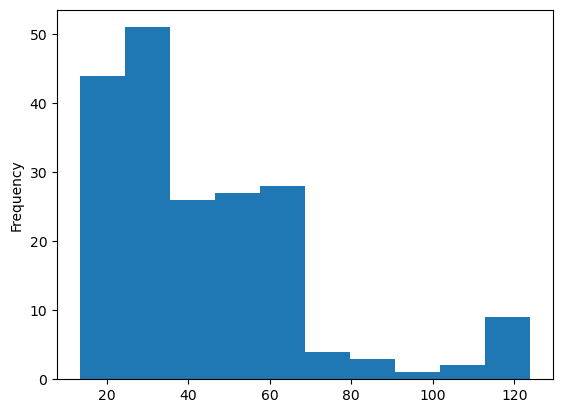

In [17]:
# start by ploting it as a historgram with 10 bins
asth2['Asthma'].plot.hist(bins=10)

In [18]:
asth_sorted = asth2.sort_values(by='Asthma',ascending = True)

In [19]:
asth_sorted[['FIPS','Asthma']].head(3)

,FIPS,Asthma
187,06075060100,13.34
160,06075012800,14.01
183,06075012901,14.46


In [20]:
asth_sorted = asth2.sort_values(by='Asthma',ascending = False)

In [21]:
asth_sorted[['FIPS','Asthma']].head(3)

,FIPS,Asthma
0,06075023200,123.98
2,06075023103,123.98
3,06075023001,123.98


All three of the above tracts are located next to each other in BVHP

<AxesSubplot: xlabel='FIPS'>

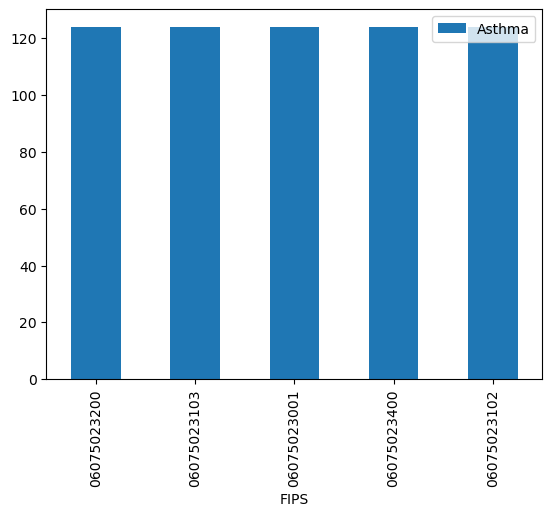

In [22]:
# plot it
asth_sorted.head(5).plot.bar(x='FIPS',
                            y='Asthma')

<AxesSubplot: title={'center': 'SF Census Tracts with the Highest Asthma Rates'}, ylabel='FIPS'>

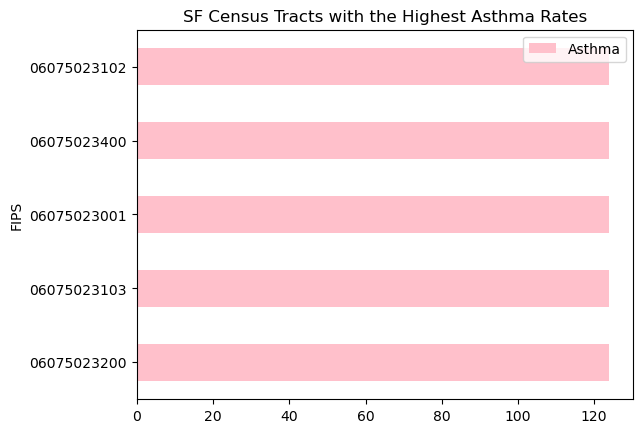

In [23]:
# we can make the bar chart look a bit prettier
asth_sorted.head(5).plot.barh(x='FIPS',
                            y='Asthma', 
                            title='SF Census Tracts with the Highest Asthma Rates',
                            color='pink')

In [24]:
asth2[asth2['Asthma']>100]

,FIPS,Asthma
0,06075023200,123.98
1,06075017902,106.14
2,06075023103,123.98
3,06075023001,123.98
4,06075023400,123.98
5,06075023102,123.98
6,06075980600,123.98
7,06075023300,123.98
8,06075061200,123.98
13,06075023003,123.98


In [25]:
# import the geopandas library
import geopandas as gpd

In [27]:
# bring in the geojson file with census tracts
tracts=gpd.read_file('data/2010CTs.geojson')
# see what the data looks like
tracts.head()

,statefp10,mtfcc10,name10,intptlat10,awater10,namelsad10,funcstat10,aland10,geoid10,tractce10,intptlon10,countyfp10,geometry
0,06,G5020,165,+37.7741958,0,Census Tract 165,S,370459,06075016500,016500,-122.4477884,075,"MULTIPOLYGON (((-122.44647 37.77580, -122.4447..."
1,06,G5020,164,+37.7750995,0,Census Tract 164,S,309097,06075016400,016400,-122.4369729,075,"MULTIPOLYGON (((-122.44034 37.77658, -122.4398..."
2,06,G5020,163,+37.7760456,0,Census Tract 163,S,245867,06075016300,016300,-122.4295509,075,"MULTIPOLYGON (((-122.42915 37.77801, -122.4289..."
3,06,G5020,161,+37.7799831,0,Census Tract 161,S,368901,06075016100,016100,-122.4286631,075,"MULTIPOLYGON (((-122.42891 37.77804, -122.4291..."
4,06,G5020,160,+37.7823363,0,Census Tract 160,S,158236,06075016000,016000,-122.4224838,075,"MULTIPOLYGON (((-122.42042 37.78058, -122.4203..."


<AxesSubplot: >

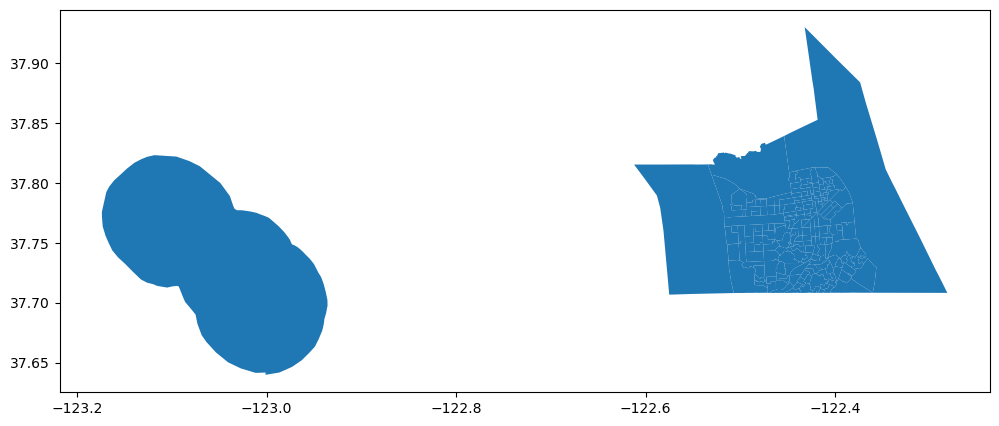

In [28]:
# plot it!
tracts.plot(figsize=(12,10))

In [29]:
# tell me more about this dataset
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   statefp10   197 non-null    object  
 1   mtfcc10     197 non-null    object  
 2   name10      197 non-null    object  
 3   intptlat10  197 non-null    object  
 4   awater10    197 non-null    object  
 5   namelsad10  197 non-null    object  
 6   funcstat10  197 non-null    object  
 7   aland10     197 non-null    object  
 8   geoid10     197 non-null    object  
 9   tractce10   197 non-null    object  
 10  intptlon10  197 non-null    object  
 11  countyfp10  197 non-null    object  
 12  geometry    197 non-null    geometry
dtypes: geometry(1), object(12)
memory usage: 20.1+ KB


In [46]:
tracts = tracts[['tractce10','geometry']]
tracts.head()

,tractce10,geometry
0,016500,"MULTIPOLYGON (((-122.44647 37.77580, -122.4447..."
1,016400,"MULTIPOLYGON (((-122.44034 37.77658, -122.4398..."
2,016300,"MULTIPOLYGON (((-122.42915 37.77801, -122.4289..."
3,016100,"MULTIPOLYGON (((-122.42891 37.77804, -122.4291..."
4,016000,"MULTIPOLYGON (((-122.42042 37.78058, -122.4203..."


In [30]:
# create a FIPS column before merging
tracts['FIPS'] ='06' + '075' + tracts['tractce10']

In [31]:
tracts.head()

,statefp10,mtfcc10,name10,intptlat10,awater10,namelsad10,funcstat10,aland10,geoid10,tractce10,intptlon10,countyfp10,geometry,FIPS
0,06,G5020,165,+37.7741958,0,Census Tract 165,S,370459,06075016500,016500,-122.4477884,075,"MULTIPOLYGON (((-122.44647 37.77580, -122.4447...",06075016500
1,06,G5020,164,+37.7750995,0,Census Tract 164,S,309097,06075016400,016400,-122.4369729,075,"MULTIPOLYGON (((-122.44034 37.77658, -122.4398...",06075016400
2,06,G5020,163,+37.7760456,0,Census Tract 163,S,245867,06075016300,016300,-122.4295509,075,"MULTIPOLYGON (((-122.42915 37.77801, -122.4289...",06075016300
3,06,G5020,161,+37.7799831,0,Census Tract 161,S,368901,06075016100,016100,-122.4286631,075,"MULTIPOLYGON (((-122.42891 37.77804, -122.4291...",06075016100
4,06,G5020,160,+37.7823363,0,Census Tract 160,S,158236,06075016000,016000,-122.4224838,075,"MULTIPOLYGON (((-122.42042 37.78058, -122.4203...",06075016000


In [33]:
# create a new dataframe based on the join, tracts is spatial data so it must come first
tracts_income=tracts.merge(asth2,on="FIPS")

In [34]:
# make sure that the merge worked
tracts_income.head(3)

,statefp10,mtfcc10,name10,intptlat10,awater10,namelsad10,funcstat10,aland10,geoid10,tractce10,intptlon10,countyfp10,geometry,FIPS,Asthma
0,06,G5020,165,+37.7741958,0,Census Tract 165,S,370459,06075016500,016500,-122.4477884,075,"MULTIPOLYGON (((-122.44647 37.77580, -122.4447...",06075016500,41.46
1,06,G5020,164,+37.7750995,0,Census Tract 164,S,309097,06075016400,016400,-122.4369729,075,"MULTIPOLYGON (((-122.44034 37.77658, -122.4398...",06075016400,46.92
2,06,G5020,163,+37.7760456,0,Census Tract 163,S,245867,06075016300,016300,-122.4295509,075,"MULTIPOLYGON (((-122.42915 37.77801, -122.4289...",06075016300,48.45


In [35]:
tracts_income.shape

(195, 15)

<AxesSubplot: >

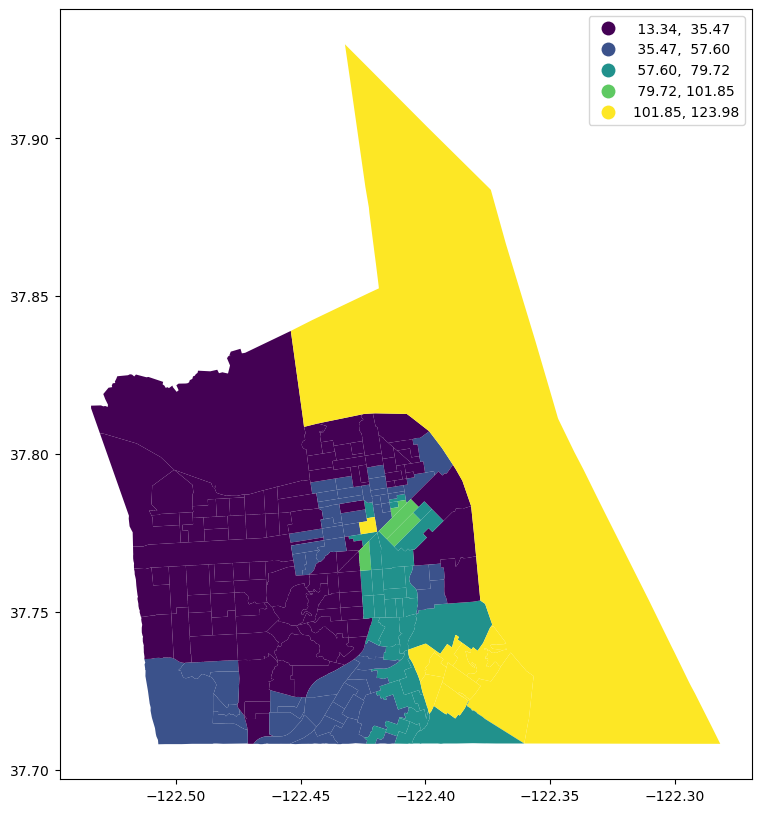

In [36]:
#generate a choropleth map based on the merged dataset 
tracts_income.plot(figsize=(12,10),
                 column='Asthma',
                 legend=True, 
                 scheme='equal_interval')

In [39]:
import folium

In [40]:
m = folium.Map(location=[37.7,-122.4], 
               zoom_start = 11,
               tiles='CartoDB positron', 
               attribution='CartoDB')

In [42]:
# plot choropleth over the base map
folium.Choropleth(
                  geo_data=tracts_income, # geo data
                  data=tracts_income, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Asthma'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.2, 
                  fill_opacity=0.8,
                  line_opacity=0.5, # line opacity (of the border)
                  legend_name='Asthma Rates (# of Emergency Dept Visits per 10K People)').add_to(m)    # name on the legend
m